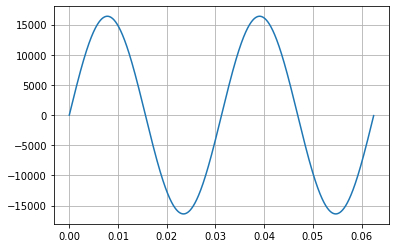

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import wave

"""Gera uma senoide"""
def gerarSenoide(frequencia, duracao, valorPico, taxaAmostragem):
     
    periodo = 1.0 / float(frequencia)
    omega = np.pi * 2.0 / periodo
    deltaX= 1.0 / float(taxaAmostragem)
     
    tempo = np.arange(start=0, stop= duracao, step= deltaX, dtype=np.float)
    valorSinal = valorPico * np.sin(tempo * omega)
     
    ciclos= int(2 * periodo * taxaAmostragem)
     
    plt.plot(tempo[0:ciclos], valorSinal[0:ciclos])
    plt.grid()
    plt.show()
 
    return valorSinal

class SoundFile:
    
    def __init__(self, sinal, nomeArquivo, taxaAmostragem):
        
        self.sinal = sinal.tobytes()
        self.fileWav = wave.open(nomeArquivo, mode='wb')
        self.fileWav.setnchannels(2)
        self.fileWav.setsampwidth(2)
        self.fileWav.setframerate(taxaAmostragem)
        self.fileWav.writeframes(self.sinal)
        self.fileWav.close()

senoide = gerarSenoide(32, 1, 16384, 44100)     
audio = SoundFile(senoide, 'audio2.wav', 44100)